####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm  using k fold
####Step 5: Finding accuracy, specificity 

In [1]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Sklearn for SVC
from sklearn.svm import SVC
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score,recall_score
from itertools import cycle

In [3]:
!pip install scikit-plot

In [2]:
pip install hmmlearn

     |████████████████████████████████| 129 kB 5.2 MB/s 


In [4]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Accelerometer_Data = pd.read_csv("Accelerometer.csv") 
#Printing the top 5 rows from dataframe
Accelerometer_Data.head()

Saving Accelerometer.csv to Accelerometer.csv


,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [ ]:
#Getting how many rows and columns
Accelerometer_Data.shape

(51000, 5)

In [ ]:
#Getting the information of each feature
Accelerometer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [ ]:
#Checking the null values
Accelerometer_Data.isnull().sum()

wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#Getting the Statistical Information
Accelerometer_Data.describe()

,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [ ]:
#Get count of number of wconfid
Accelerometer_Data['wconfid'].value_counts()

1    51000
2    51000
3    51000
Name: wconfid, dtype: int64

In [ ]:
#Grouping the classes and taking the count
df = pd.DataFrame(Accelerometer_Data.groupby(by = ['wconfid']).size().reset_index(name = 'count'))
#Getting count of classes
fig = px.pie(df, values="count" , names ="wconfid",color_discrete_sequence = px.colors.sequential.RdBu, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Classes')
fig.show()

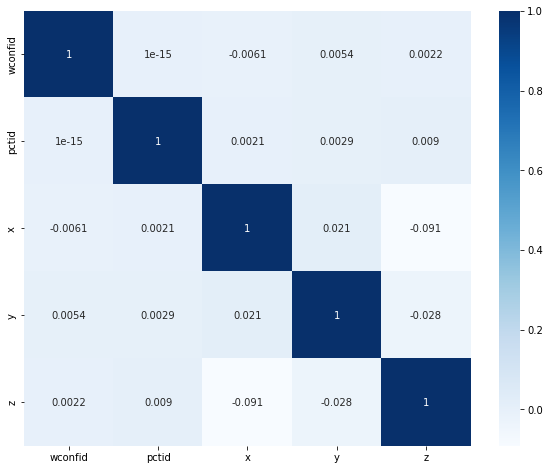

In [ ]:
#Seeing the correlation for each feature using the heatmap
fig, ax = plt.subplots(figsize=(10,8))
fig.patch.set_facecolor('white')
sns.heatmap(Accelerometer_Data.corr(), ax=ax, annot=True, cmap="Blues")

In [54]:
Accelerometer_Data.columns

Index(['pctid', 'x', 'y', 'z'], dtype='object')

In [55]:
# Columns for normalization
from sklearn.preprocessing import Normalizer
normalizeFeatures = ['pctid', 'x', 'y', 'z']

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

ct = ColumnTransformer([("norm", Normalizer(norm='l1'), normalizeFeatures)])
pipe = Pipeline([('normalization', ct), ('pca', PCA())])

In [57]:
X = pipe.fit_transform(Accelerometer_Data)

In [58]:
type(X)

numpy.ndarray

In [59]:
X.shape

(153000, 4)

In [60]:
# Label Encoding the output variable
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [61]:
y.shape

(153000,)

In [62]:
# Defining function to get the data of particular class

def getClassData(cls, dataframe, y):
  # Getting the indexes for specific class
  indexes = np.where(y == cls)
  return dataframe[indexes], y[indexes]

In [89]:
import scikitplot as skplt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix, accuracy_score
from hmmlearn import hmm

from itertools import cycle

k = StratifiedKFold(n_splits=5)

Kfold = 0

actual_classes = list()
predicted_classes = list()
f1_scores = list()
auc_scores = list()
accuracy_scores = list()
precision_scores = list()

sen1=[]
sen2=[]
sen3=[]

spec1=[]
spec2=[]
spec3=[]

for train_index, test_index in k.split(X, y):
  Kfold += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  print(f"Fold {Kfold}")
  # print(y_test)

  # Handling classifiers for each classes
  # hmms = list()
  # hmm_proba = list()
  for classIndex in range(3):
    classValues_train, y_values = getClassData(classIndex, X_train, y_train)
    # print("classValues", len(y_values))

    split_accu = list()
    split_f1 = list()
    split_precision = list()
    split_auc = list()
    GHMM = hmm.GaussianHMM(n_components = 2, algorithm="viterbi", covariance_type = "diag", n_iter = 50)
    GHMM.fit(classValues_train)
    proba = GHMM.score(X_test)
    predicted = GHMM.predict(X_test)
    #print("probability is", proba)
    
    cm = confusion_matrix(y_test,predicted)

    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1]+cm[0,2])
    sen1.append(sensitivity1)


    specificity1 = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
    spec1.append(specificity1)

    #specificity and sensitivity for class 2
    sensitivity2 = cm[1,1]/(cm[1,0]+cm[1,1]+cm[1,2])
    sen2.append(sensitivity2)

    specificity2 = (cm[0,0]+cm[2,2])/(cm[0,1]+cm[2,1]+cm[0,0]+cm[2,2])
    spec2.append(specificity2) 

    #specificity and sensitivity for class 3
    sensitivity3 = cm[2,2]/(cm[2,0]+cm[2,1]+cm[2,2])
    sen3.append(sensitivity3)

    specificity3 = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])
    spec3.append(specificity3)


    y_prob= GHMM.predict_proba(X_test)
    # Calculating accuracy
    split_accu.append(accuracy_score(y_test, predicted))
 


  print('\n')
  print("Accurancy is",np.mean(split_accu))
  print('\n')
  print('Confusion Matrix:')
  print(cm)
  print('\n')
  print('Sensitivity for class 1: ', sensitivity1)
  print('Specificity for class 1: ', specificity1)
  print('\n')
  print('Sensitivity for class 2: ', sensitivity2)
  print('Specificity for class 2: ', specificity2)
  print('\n')
  print('Sensitivity for class 3: ', sensitivity3)
  print('Specificity for class 3: ', specificity3)
  print('\n')

Fold 1


Accurancy is 0.3333333333333333


Confusion Matrix:
[[10200     0     0]
 [10200     0     0]
 [10200     0     0]]


Sensitivity for class 1:  1.0
Specificity for class 1:  0.0


Sensitivity for class 2:  0.0
Specificity for class 2:  1.0


Sensitivity for class 3:  0.0
Specificity for class 3:  1.0


Fold 2


Accurancy is 0.31594771241830066


Confusion Matrix:
[[   64 10136     0]
 [  596  9604     0]
 [ 3778  6422     0]]


Sensitivity for class 1:  0.006274509803921568
Specificity for class 1:  0.6870796966661897


Sensitivity for class 2:  0.9415686274509804
Specificity for class 2:  0.003850318854530141


Sensitivity for class 3:  0.0
Specificity for class 3:  1.0


Fold 3


Accurancy is 0.4725816993464052


Confusion Matrix:
[[ 7598  2602     0]
 [ 3337  6863     0]
 [    0 10200     0]]


Sensitivity for class 1:  0.7449019607843137
Specificity for class 1:  0.672843137254902


Sensitivity for class 2:  0.672843137254902
Specificity for class 2:  0.37245098039215685



In [91]:
acc = accuracy_score(y_test,predicted)
print("Accuracy score for testing data in  is : {}".format(acc))

Accuracy score for testing data in  is : 0.33336601307189545


In [87]:
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test,predicted)))
print("\nClassification report: \n" + str(classification_report(y_test,predicted)))


Confusion matrix: 
[[10200     0     0]
 [10199     1     0]
 [    0 10200     0]]

Classification report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10200
           1       0.00      0.00      0.00     10200
           2       0.00      0.00      0.00     10200

    accuracy                           0.33     30600
   macro avg       0.17      0.33      0.22     30600
weighted avg       0.17      0.33      0.22     30600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
